# Titanic survived Project

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 

Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 


# Attribute Information

Passenger id- Unique Id of the passenger

Pclass- Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

Survived- Survived (0 = No; 1 = Yes)

Name- Name of the passenger

Sex- Sex of the passenger (Male, Female)

Age- Age of the passenger

Sibsp- Number of Siblings/Spouses Aboard

Parch- Number of Parents/Children Aboard

Ticket- Ticket Number

Fare- Passenger Fare (British pound)

Cabin- Cabin

Embarked- Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

# Dataset Link-

https://github.com/dsrscientist/dataset1/blob/master/titanic_train.csv

# Answer:-

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Exploratory Data Analysis(E.D.A)

In [3]:
#Checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
#Checking null values for all columns
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Observation:-**
    
*1) We can see for Cabin column from 891 rows 687 are empty that means 77% data is empty of this column so it's no use to fill this NAN value with imputer or mean,median,mode beacuse if we do then this column fill with all duplicate values.**So for those columns which has more than 50% data is Null we have to drop that column.So I will drop the Cabin column**.*

*2)In Age column there are 177 NaN values and I will fill those values using Median.Here I would not use mean because if I use mean than this column maybe suffered with outliers.*

*3) For Embarked columnn we can use Mode to fill those 2 NaN values because this collumn has string.*

**Filling NaN values of all columns**

In [6]:
#Droping Cabin column
df.drop("Cabin",axis=1,inplace=True)
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


*You can see Cabin column is deleted.*

In [7]:
#Filling Nan Values of Age column with it's Median
df["Age"].fillna(df["Age"].median(),inplace=True)

In [8]:
#Filling Nan Values of Embarked column with it's Mode
print(df["Embarked"].mode())
df["Embarked"].fillna(df["Embarked"].mode().iloc[0],inplace=True)

0    S
Name: Embarked, dtype: object


In [9]:
#Checking NaN values of all column again
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

*Now you can see there is no null values are present.*

<Axes: >

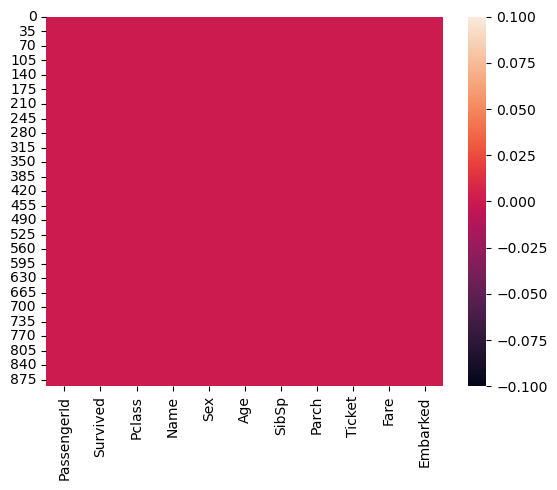

In [10]:
sns.heatmap(df.isnull())

**Checking for duplicate row**

In [11]:
df.duplicated().sum()

0

*Here no duplicated rows are present*

**Checking unique values for all columns**

In [12]:
df.nunique().to_frame("Unique value counts")

,Unique value counts
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


**Observation:-**
    
*1) We can see all values of PassengerId column is unique and PassengerId columnns in an unimportant column for us to predict a person will survive or not.So I can handle this column with two technique,either I will make this column as Index or I can delete this column.*

*2) we can see for name column also all values are unique and this values are also unimportant for our person survival prediction.So we will drop this column aslo.*

*3) We can also drop the Ticket column but I choose to not drop it because maybe it contain some information to predict our passanger survival prediction lets see:*

*4) Here Survived,Pclass,Sex,Embarked these columns are categorical columns beacuse the difference between count of these columns values and their unique value is very high,so we can consider these column as categorical columns.*

**5) Most important thing our Target column that is Survivd here,and the difference between it value counts with it's unique value count is too high that means itr's a Classification problem.**

**Working according to Observation**

In [13]:
#Set PassengerId column as Index
df.set_index("PassengerId",inplace=True)

In [14]:
df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [15]:
#Delete Name column
df.drop("Name",axis=1,inplace=True)

In [16]:
df.tail(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
890,1,1,male,26.0,0,0,111369,30.00,C
891,0,3,male,32.0,0,0,370376,7.75,Q


*We can see Name column is deleted*

In [17]:
df.shape

(891, 9)

# Description of Dataset

In [18]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Observation:-**
    
*1) For Age and Fare column there is a huge difference between 75% and Max so outliers must be present in these columns.*


*2) For SibSp and Parch column there also a huge difference between 75% and Max but we can ignore that because these are Categorical columns.*

# Data Visualization:-

**Univariate Analysis**

male      577
female    314
Name: Sex, dtype: int64


<Axes: xlabel='Sex', ylabel='count'>

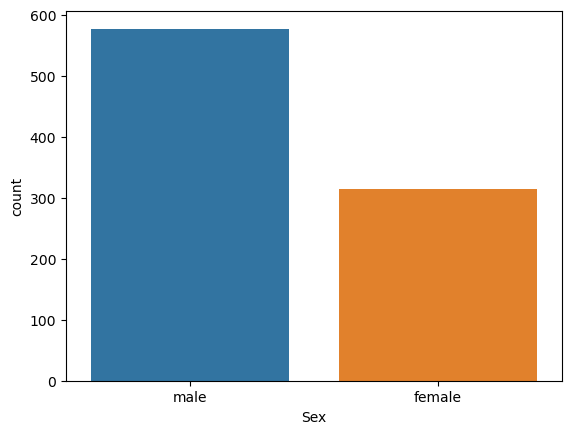

In [19]:
print(df["Sex"].value_counts())
sns.countplot(x="Sex",data=df)

0    549
1    342
Name: Survived, dtype: int64


<Axes: xlabel='Survived', ylabel='count'>

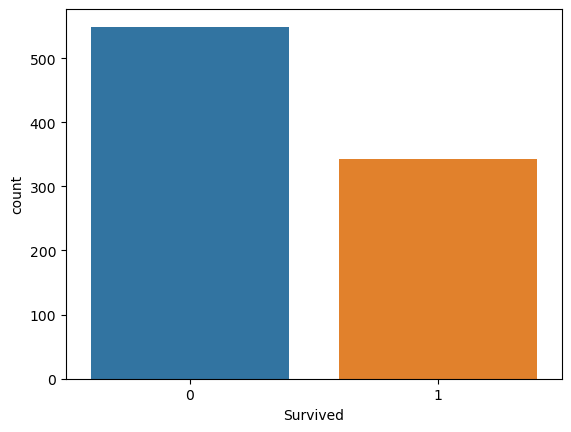

In [20]:
#Checking visualize count of our Target column
print(df["Survived"].value_counts())
sns.countplot(x="Survived",data=df)

**We can observe that the count of "No Survived" are high compared to the count of "No Survived" i.e there are more number of passangers who did not survived. This leads to class imbalance issue in the data. we will fix it by using oversampling method like smote in later part.**

S    646
C    168
Q     77
Name: Embarked, dtype: int64


<Axes: xlabel='Embarked', ylabel='count'>

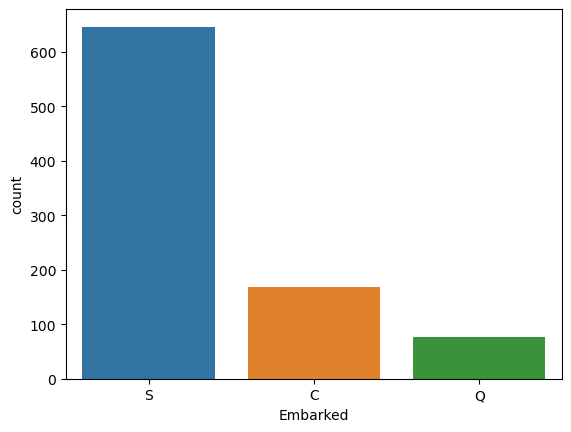

In [21]:
print(df["Embarked"].value_counts())
sns.countplot(x="Embarked",data=df)

3    491
1    216
2    184
Name: Pclass, dtype: int64


<Axes: xlabel='Pclass', ylabel='count'>

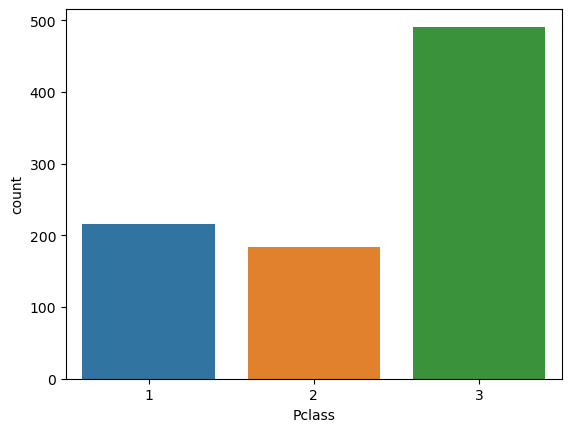

In [22]:
print(df["Pclass"].value_counts())
sns.countplot(x="Pclass",data=df)

**Bi-Variate Analysis**

<Axes: xlabel='Pclass', ylabel='Fare'>

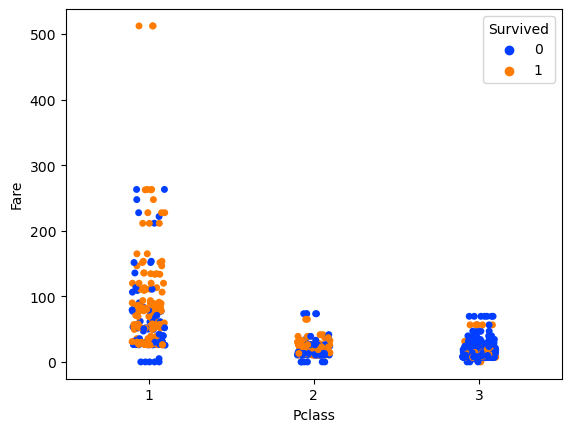

In [23]:
sns.stripplot(x="Pclass",y="Fare",hue="Survived",palette="bright",data=df)

**Here you can see those passengers who are in 3rd Class their survied rate is higher than the other class also they have to pay less from the other class passengers.**

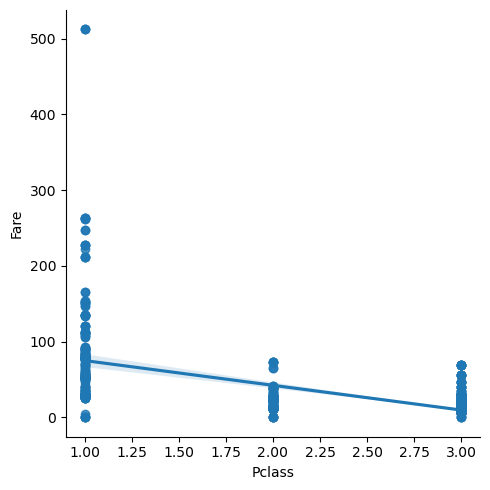

In [24]:
sns.lmplot(x="Pclass",y="Fare",data=df)

**Here you can see if the you booked 1st Class Tickets you have to pay High Charges,for 2nd Class you have to pay less compare to the 1St Class,For 3rd Class you have to pay least money.**

***Multi-Variate Analysis**

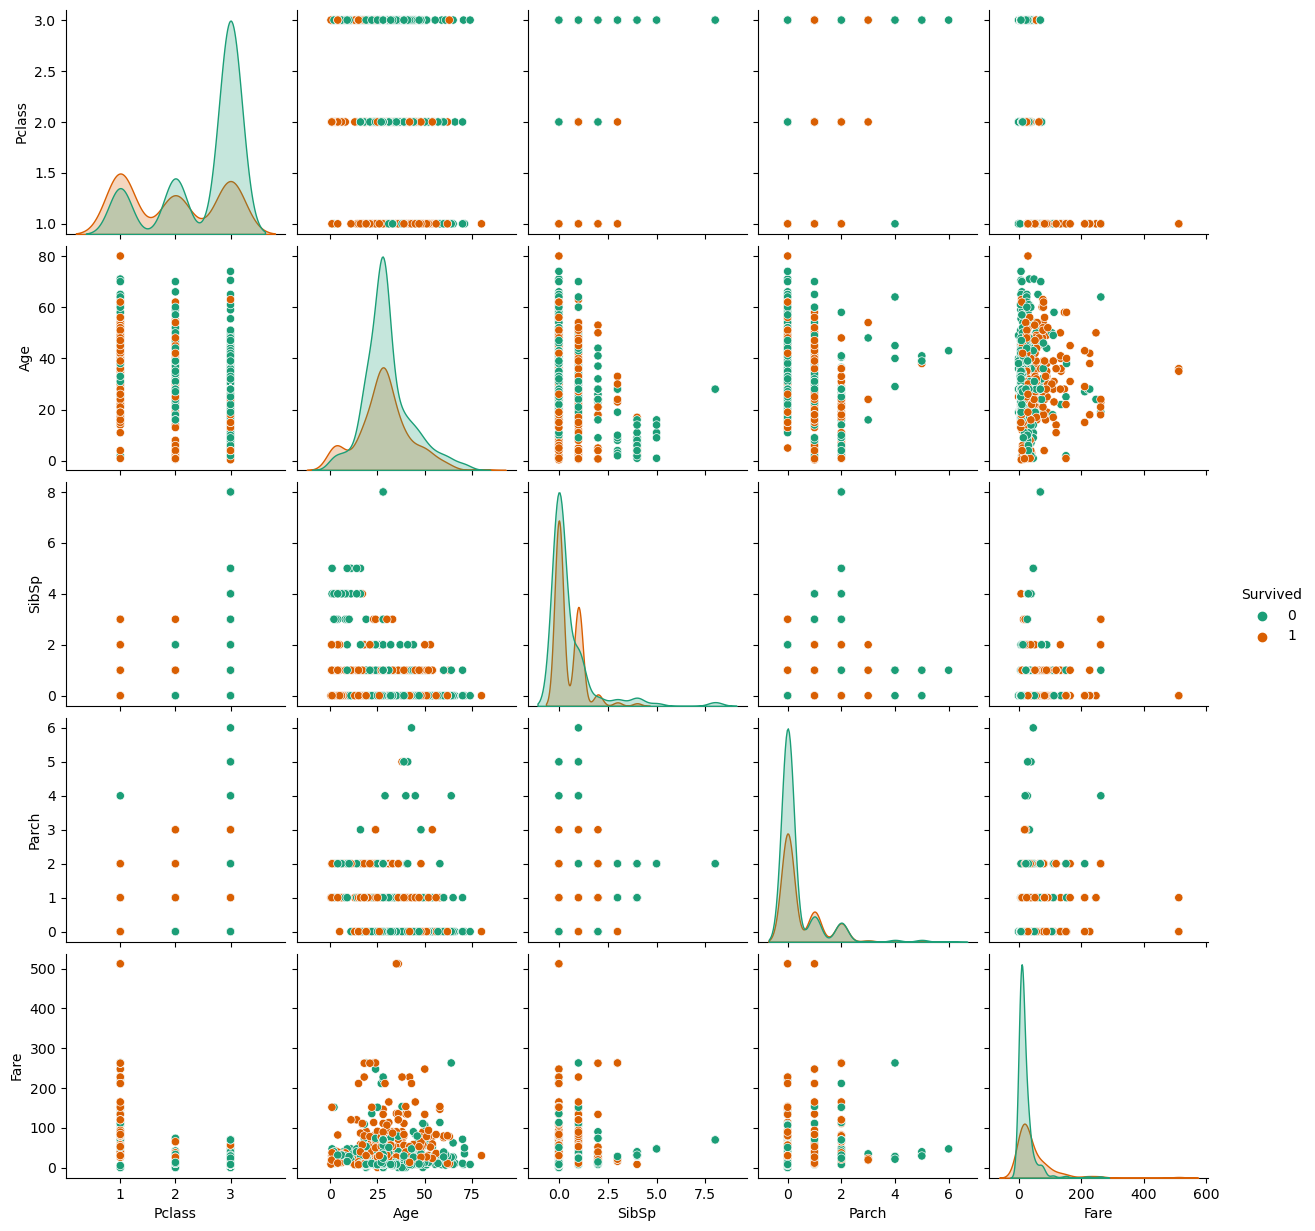

In [25]:
sns.pairplot(df,hue="Survived",palette="Dark2")

# Checking for outliers

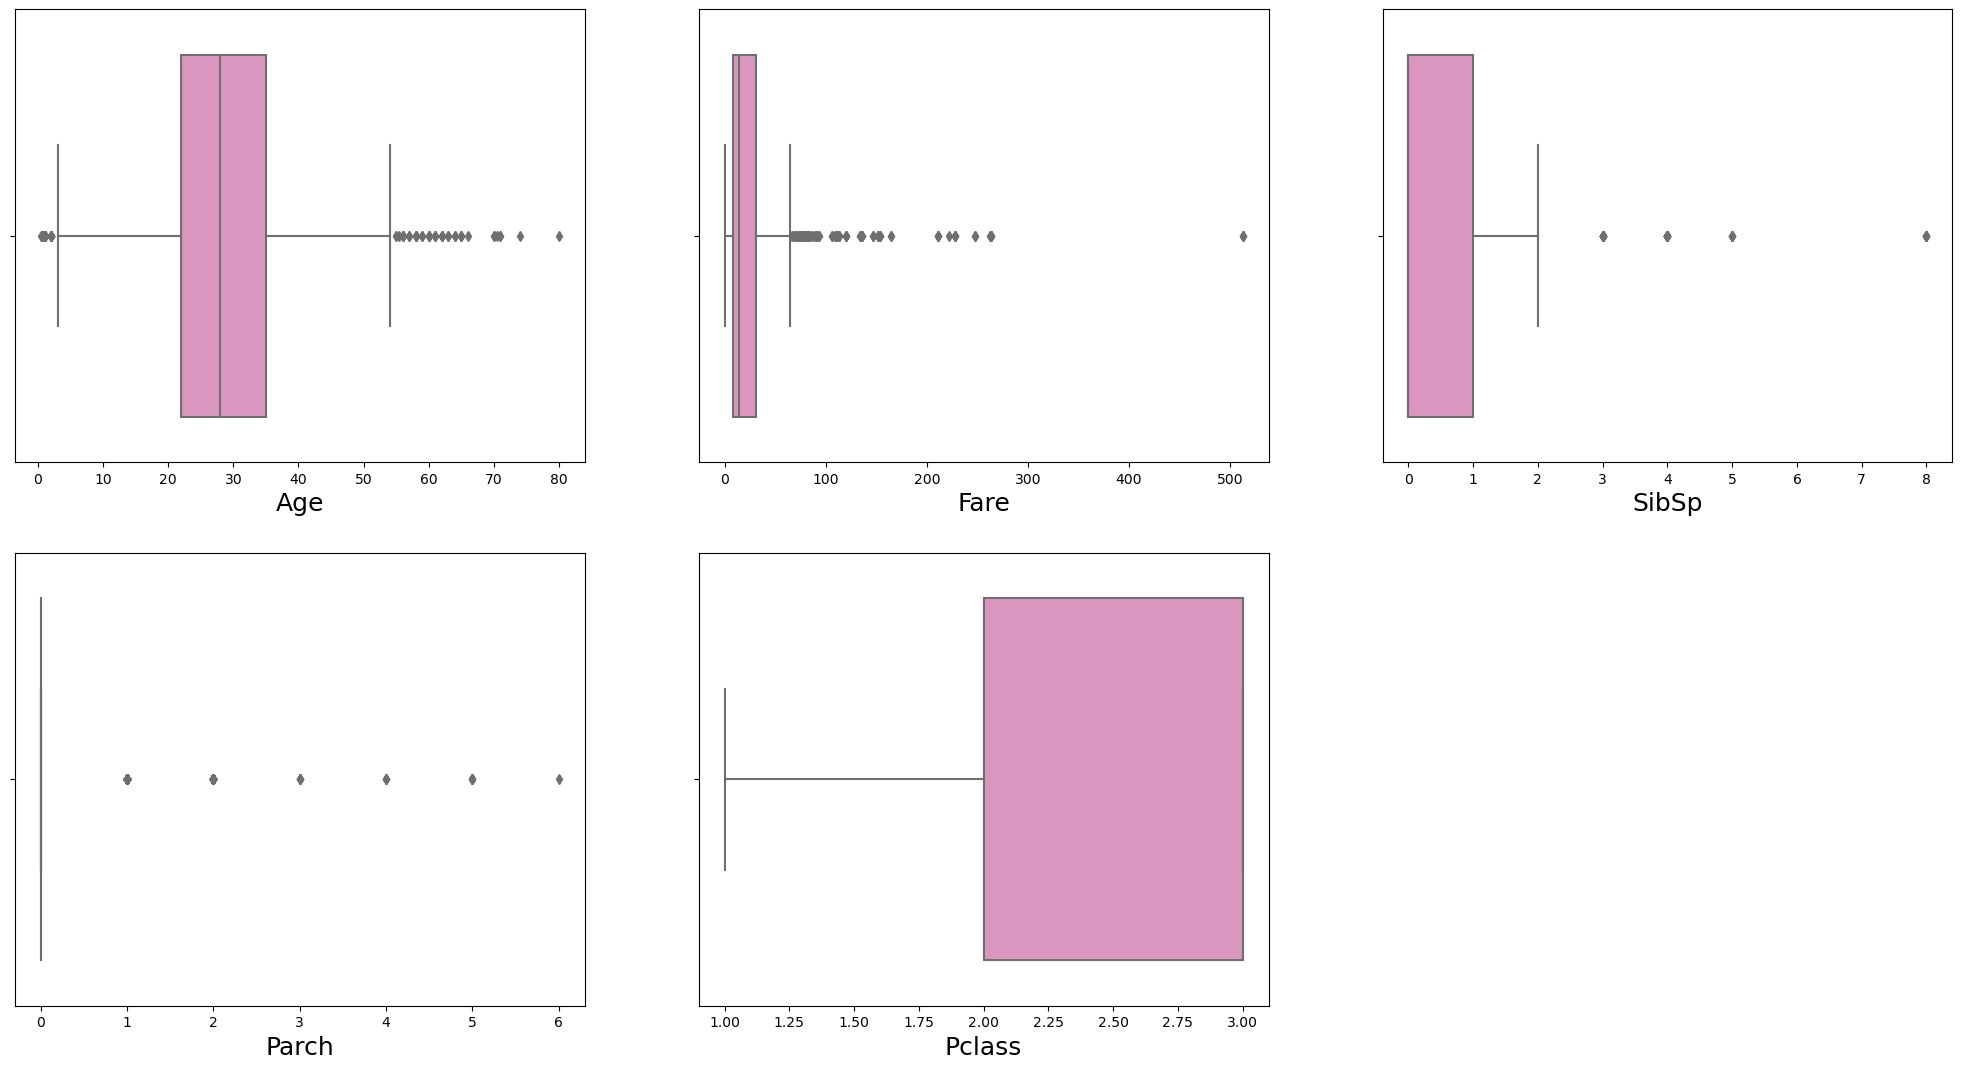

<Figure size 640x480 with 0 Axes>

In [26]:
#avoiding Survived column because it's my Target column and avoiding Sex column because it's categorical also it has string values 
class_columns=["Age","Fare","SibSp","Parch","Pclass"]
plt.figure(figsize=(25,20),facecolor="white")
p=1
for i in class_columns:
    if p<=10 and i in df.columns:
        
            
        plt.subplot(3,3,p)
        sns.boxplot(x=i,palette="Set2_r",data=df)
        plt.xlabel(i,fontsize=18)
        plt.yticks(rotation=0,fontsize=18)
    p+=1
plt.show()
plt.tight_layout()

**Observation-**

*We can see for "Age","Fare","SibSp" these columns  outliers are present and for "Parch" column there are only some outliers no boxplot is present because  without the box and whiskers, it's likely that all the data points in that column are very close together.So I will do some more analysis on this column.*

<Axes: xlabel='Parch', ylabel='count'>

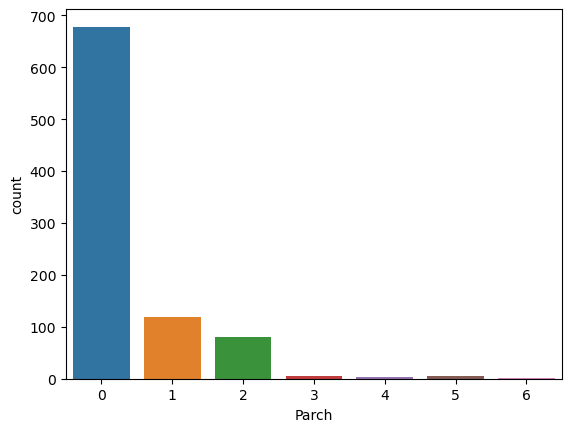

In [27]:
df["Parch"].value_counts()
sns.countplot(x="Parch",data=df)

In [28]:
df["Parch"].nunique()

7

So you can see there is only 7 unique values for "parch" and "Sibsp" column so we can consider those as Categorical columns and we can ignore it's outliers.

**Observation:-**
    
*So we have to remove outliers from only three columns Age,Fare columns only

# Removing outliers

**Using zscore**

In [29]:
zscore_removeable_features=df[["Age","Fare"]]
from scipy.stats import zscore

z=zscore(np.abs(zscore_removeable_features))
z

,Age,Fare
PassengerId,,
1,-0.565736,-0.502445
2,0.663861,0.786845
3,-0.258337,-0.488854
4,0.433312,0.420730
5,0.433312,-0.486337
...,...,...
887,-0.181487,-0.386671
888,-0.796286,-0.044381
889,-0.104637,-0.176263


In [30]:
np.where(z>3)

(array([ 27,  88,  96, 116, 118, 258, 299, 311, 341, 377, 380, 438, 493,
        527, 557, 630, 672, 679, 689, 700, 716, 730, 737, 742, 745, 779,
        851], dtype=int64),
 array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 0], dtype=int64))

In [31]:
#Checking outliers by giving row and column number
z.iloc[27,1]

4.647001076532463

# Removing Outliers

In [32]:
new_df=df[(z<3).all(axis=1)]
new_df.shape

(864, 9)

In [33]:
print("Old DataFrame",df.shape[0])
print("New DataFrame",new_df.shape[0])

Old DataFrame 891
New DataFrame 864


**Here you can see 57 rows are deleted because these rows had outliers.**

In [34]:
print("Data lost percentage after appliing zscore:-",((df.shape[0]-new_df.shape[0])/df.shape[0])*100)

Data lost percentage after appliing zscore:- 3.0303030303030303


# Checking Data Distribution for each column

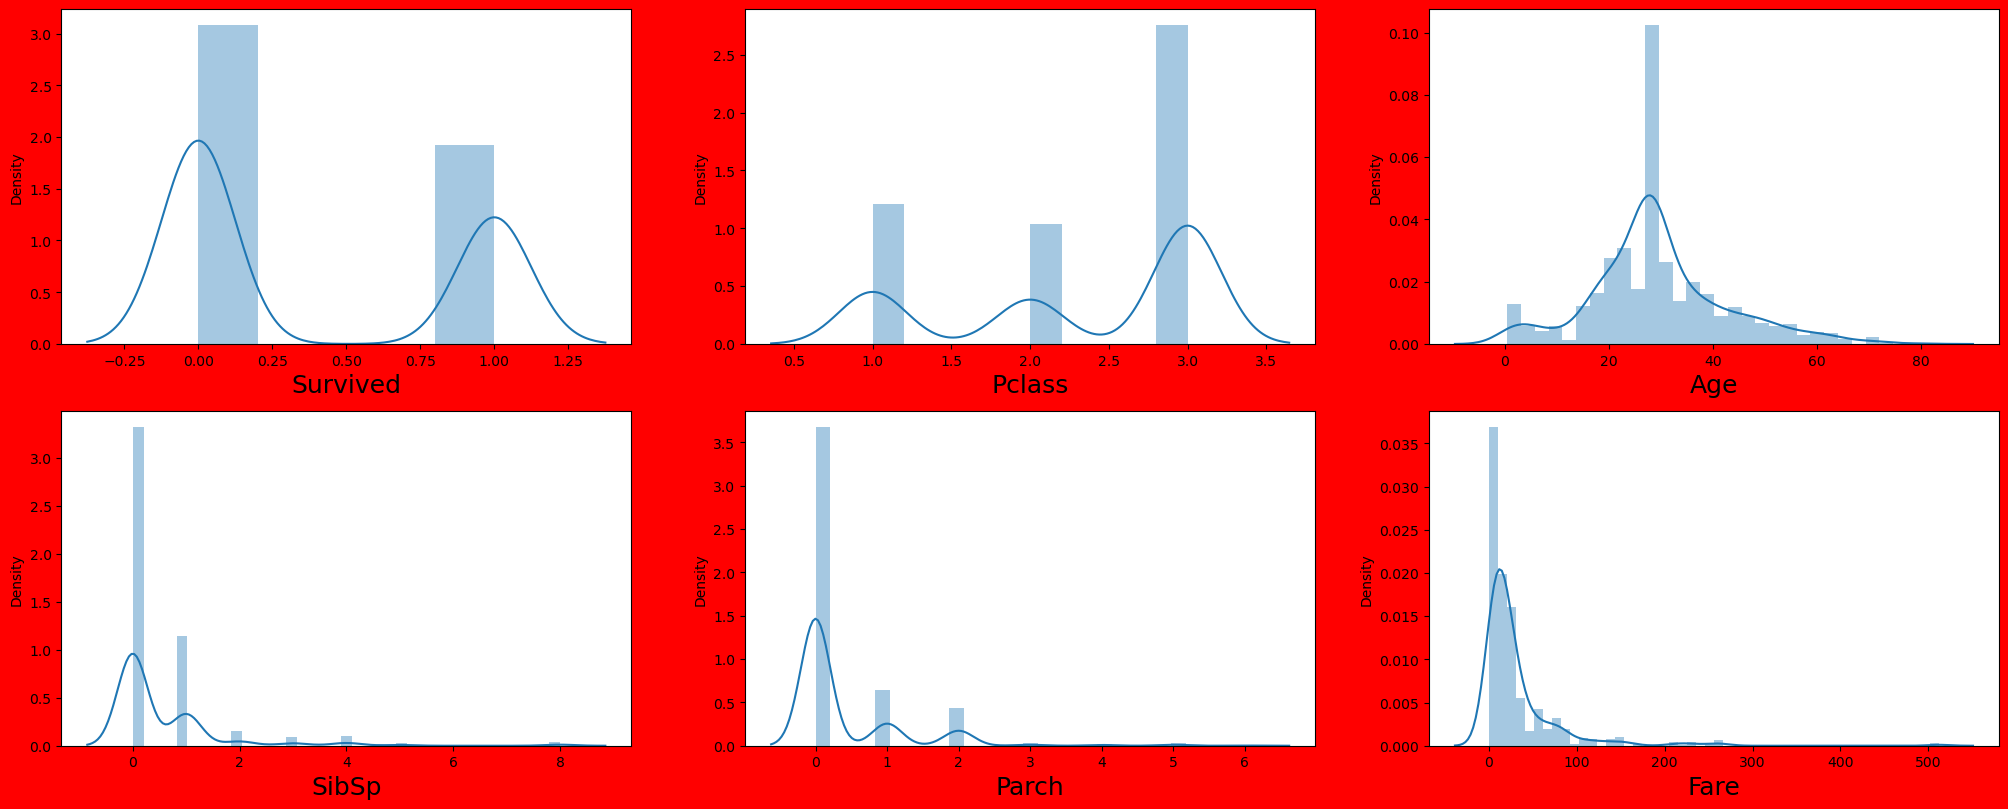

<Figure size 640x480 with 0 Axes>

In [35]:
plt.figure(figsize=(25,20),facecolor="r")
plot=1
for i in new_df.columns:
    
    if plot<=14:
        if i in ["Sex","Ticket","Embarked"]:
            continue
        plt.subplot(4,3,plot)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=18)
    plot+=1
    
plt.show()
plt.tight_layout()

**Observation:-**
    
1) *Here we can see apart from the Fare column all columns are normally distributed.Right skewness is present in The Fare column.*

In [36]:
new_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

# Checking for skewness

In [37]:
new_df.skew().to_frame("Skewness values")

,Skewness values
Survived,0.502011
Pclass,-0.708375
Age,0.321096
SibSp,3.751753
Parch,2.840412
Fare,2.257178


**Here you can see our Pclass,SibSp,Parch,Fare has higher skewness value than our acceptable range(+0.5 to -0.5) but Pclass,SibSp,Parch these columns are Categorical colunms.So we have to work on only Fare column to reduce it's skewness.** 

# Reducing Skewness

In [38]:
#Reducing skewness for Fare column using cube root
new_df["Fare"]=np.cbrt(new_df["Fare"])


In [39]:
#Checking skewness again
new_df.skew()

Survived    0.502011
Pclass     -0.708375
Age         0.321096
SibSp       3.751753
Parch       2.840412
Fare        0.619588
dtype: float64

**Still the skewness value of "Fare" column is not in acceptable range.**

In [40]:
new_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [41]:
#Trying to reducing skewness again for Fare column but this time with sqrt method
new_df["Fare"]=np.sqrt(new_df["Fare"])

In [42]:
#Checking skewness again
new_df.skew()

Survived    0.502011
Pclass     -0.708375
Age         0.321096
SibSp       3.751753
Parch       2.840412
Fare       -1.595310
dtype: float64

**Still "Fare" column is not in range.Now I will try Log tranformation on it.**

In [43]:
new_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [44]:
#Trying to reducing skewness again for Fare column but this time with log transformation method
new_df["Fare"]=np.log(new_df["Fare"])

In [45]:
#Checking skewness again
new_df.skew()

Survived    0.502011
Pclass     -0.708375
Age         0.321096
SibSp       3.751753
Parch       2.840412
Fare             NaN
dtype: float64

**Now you can see Skewness value of Fare column is NaN.So now I will use log transformation with an added constant(+1)(np.log1p()).Lets see:**

In [46]:
new_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [47]:
#Trying to reducing skewness again for Fare column but this time with log function +1 method
new_df["Fare"]=np.log1p(new_df["Fare"])

In [48]:
#Checking skewness again
new_df.skew()

Survived    0.502011
Pclass     -0.708375
Age         0.321096
SibSp       3.751753
Parch       2.840412
Fare        0.597998
dtype: float64

**Still Fare column is out of our acceptable range.So I will use power transformer method on this column.**

In [49]:
new_df.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age          0
SibSp        0
Parch        0
Ticket       0
Fare        15
Embarked     0
dtype: int64

**So you can see after applying log1p() method our "Fare" column has some missing value issue,like in this column 15 values are missing so before going for PowerTransformer method I have to fill these missing value first.Let see which techeniques is sutable to fill the "Fare" columns NaN vale mean() or median.Lets check:**

In [50]:
print(new_df["Fare"].mean())
print(new_df["Fare"].median())

0.38760101202946384
0.36822292869392886


**So most of the time if we take median to fill NaN values there would not be no outliers problems will happens.And here is so less difference between mean() and median() ,so I will prefer median() over mean()here.**

In [51]:
#Filling NaN values of "Fare" column using "Fare" column's median
new_df["Fare"]=new_df["Fare"].fillna(new_df["Fare"].median())

In [52]:
#Checking null value for all columns
new_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

**We can see here no NaN value is pressent now.**

In [53]:
from sklearn.preprocessing import PowerTransformer
reshape_Fare_column=new_df["Fare"].values.reshape(-1,1)
pt=PowerTransformer("yeo-johnson")  #yeo-johnson method works on both positive and Negative method

#Now fitting the Transfomer
column_transformed=pt.fit_transform(reshape_Fare_column)

#Convert the transformed array back to the DataFrame
new_df["Fare"]=pd.DataFrame(column_transformed)

In [54]:
#Checking skewness again
new_df.skew()

Survived    0.502011
Pclass     -0.708375
Age         0.321096
SibSp       3.751753
Parch       2.840412
Fare        0.151336
dtype: float64

**So finally we can reduced skewness from Fare column.Now the skewness is in acceptable range.**

In [55]:
#Checking NaN vale again
new_df.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age          0
SibSp        0
Parch        0
Ticket       0
Fare        28
Embarked     0
dtype: int64

**So you can see here is 28 NaN values are present in Fare column. We have to fill these again**

In [56]:
#Filling NaN values of Fare column
print(new_df["Fare"].mean())
print(new_df["Fare"].median())

new_df["Fare"]=new_df["Fare"].fillna(new_df["Fare"].median())

-0.003316756381685283
-0.022751957236501735


In [57]:
new_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

**Now you can see no null value is present in any column**

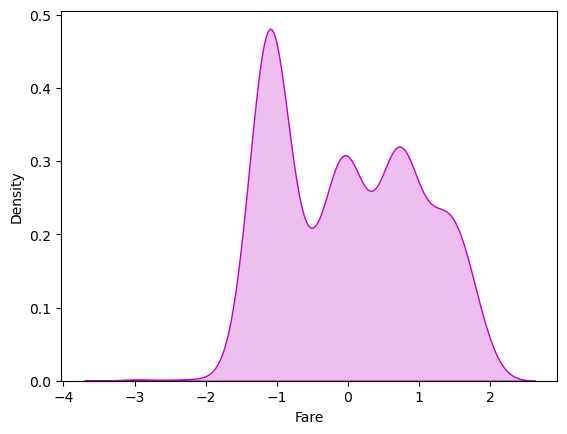

In [58]:
#Checking distribution oF Fare column now
sns.distplot(new_df["Fare"],color="m",hist=False,kde_kws={"shade":True})
plt.show()

**So we can see data is  almost normally distributed.**

# Encoding Categorical Columns

In [59]:
from sklearn.preprocessing import OrdinalEncoder

oe=OrdinalEncoder()

for col in new_df.columns:
    if new_df[col].dtypes=="object":
        new_df[col]=oe.fit_transform(new_df[col].values.reshape(-1,1))
        
new_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,1.0,22.0,1,0,517.0,1.457770,2.0
2,1,1,0.0,38.0,1,0,587.0,-1.069697,0.0
3,1,3,0.0,26.0,0,0,655.0,1.270792,2.0
4,1,1,0.0,35.0,1,0,48.0,-1.036659,2.0
5,0,3,1.0,35.0,0,0,466.0,-0.934571,2.0
...,...,...,...,...,...,...,...,...,...
887,0,2,1.0,27.0,0,0,99.0,-0.022752,2.0
888,1,1,0.0,19.0,0,0,14.0,-0.022752,2.0
889,0,3,0.0,28.0,1,2,661.0,-0.022752,2.0


**So we can see our categorical columns are changed to numerical columns let check with the .info() method also.**

In [60]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 864 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  864 non-null    int64  
 1   Pclass    864 non-null    int64  
 2   Sex       864 non-null    float64
 3   Age       864 non-null    float64
 4   SibSp     864 non-null    int64  
 5   Parch     864 non-null    int64  
 6   Ticket    864 non-null    float64
 7   Fare      864 non-null    float64
 8   Embarked  864 non-null    float64
dtypes: float64(5), int64(4)
memory usage: 67.5 KB


In [61]:
new_df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000
mean,0.378472,2.343750,0.650463,28.978785,0.520833,0.368056,330.718750,-0.003947,1.555556
std,0.485287,0.819028,0.477100,12.498759,1.104937,0.794651,196.034111,0.981972,0.777235
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,-2.950305,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,156.750000,-1.036659,1.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,328.500000,-0.022752,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,505.250000,0.770387,2.000000
max,1.000000,3.000000,1.000000,66.000000,8.000000,6.000000,666.000000,1.867389,2.000000


**You might be thinking the difference between 75% and Max values of "SibSp","Parch" these columns are so there might be some posibilities that outliers are present on these columns but we already knows these columns are categorical columns se we can ignore it's outliers.**

# Correlation between our Target column with Indipendent columns

In [62]:
new_df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
Survived,1.000000,-0.333535,-0.534012,-0.058724,-0.041734,0.080065,-0.175933,0.018560,-0.161798
Pclass,-0.333535,1.000000,0.123990,-0.346453,0.093871,0.051075,0.360502,-0.038449,0.132880
Sex,-0.534012,0.123990,1.000000,0.065600,-0.109263,-0.250154,0.061526,-0.025046,0.105550
Age,-0.058724,-0.346453,0.065600,1.000000,-0.232166,-0.186822,-0.098014,0.016216,-0.008587
SibSp,-0.041734,0.093871,-0.109263,-0.232166,1.000000,0.408282,0.093647,0.034771,0.063416
Parch,0.080065,0.051075,-0.250154,-0.186822,0.408282,1.000000,0.037009,0.051075,0.045652
Ticket,-0.175933,0.360502,0.061526,-0.098014,0.093647,0.037009,1.000000,-0.031426,0.038748
Fare,0.018560,-0.038449,-0.025046,0.016216,0.034771,0.051075,-0.031426,1.000000,0.030517
Embarked,-0.161798,0.132880,0.105550,-0.008587,0.063416,0.045652,0.038748,0.030517,1.000000


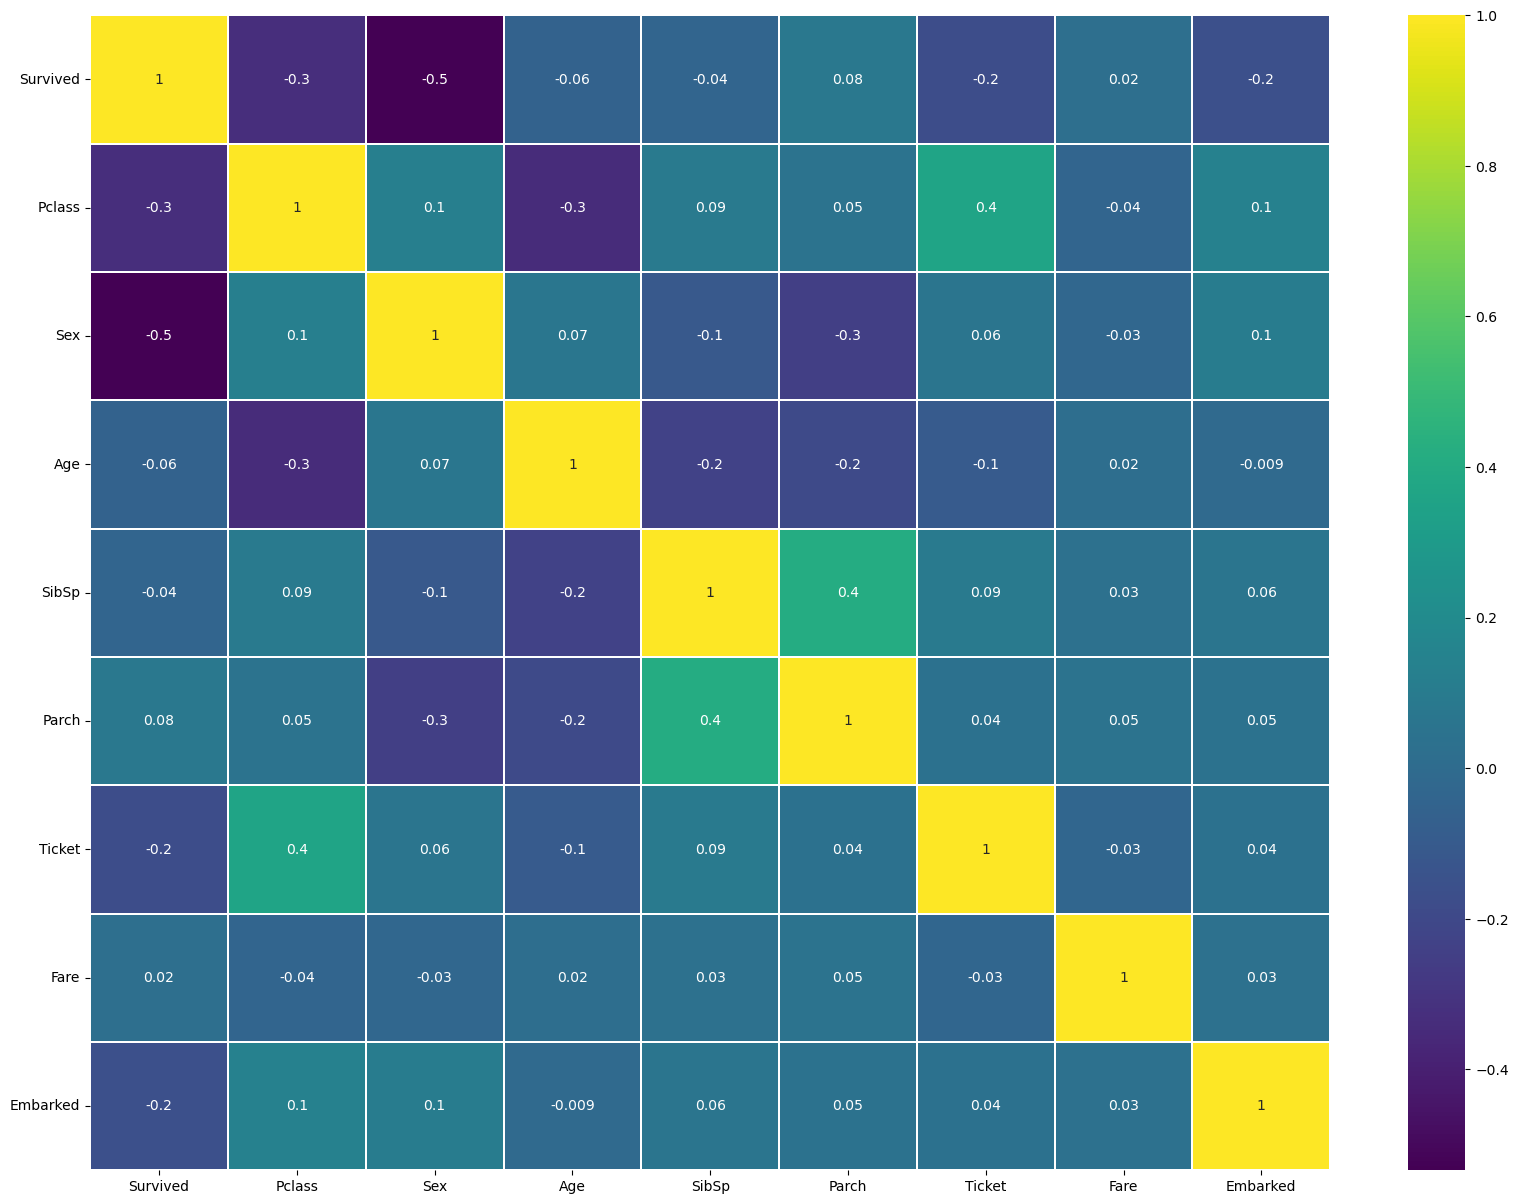

In [63]:
#Visualizing correlation with heatmap
plt.figure(figsize=(20,15))
sns.heatmap(new_df.corr(),cmap="viridis",linewidths=0.1,fmt=".1g",annot=True)
plt.yticks(rotation=0)
plt.show()

**Observation:-**
    
*1) "Sex" column is the  most negative(-0.5) correlation with our Target column ("Survived").*

In [64]:
new_df.corr()["Survived"].sort_values(ascending=False)

Survived    1.000000
Parch       0.080065
Fare        0.018560
SibSp      -0.041734
Age        -0.058724
Embarked   -0.161798
Ticket     -0.175933
Pclass     -0.333535
Sex        -0.534012
Name: Survived, dtype: float64

# Separating Features and Label

In [65]:
x=new_df.iloc[:,1:]
y=new_df.iloc[:,0]

In [66]:
x.head(1)

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,
1,3,1.0,22.0,1,0,517.0,1.45777,2.0


In [67]:
y.tail(2)

PassengerId
890    1
891    0
Name: Survived, dtype: int64

# Feature scalling using StandardScaler

In [68]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=pd.DataFrame(sc.fit_transform(x),columns=x.columns)
x

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0.801719,0.733053,-0.558682,0.433911,-0.463435,0.950800,1.489415,0.572159
1,-1.641615,-1.364158,0.722187,0.433911,-0.463435,1.308087,-1.085945,-2.002556
2,0.801719,-1.364158,-0.238464,-0.471642,-0.463435,1.655166,1.298893,0.572159
3,-1.641615,-1.364158,0.482024,0.433911,-0.463435,-1.443027,-1.052281,0.572159
4,0.801719,0.733053,0.482024,-0.471642,-0.463435,0.690490,-0.948259,0.572159
...,...,...,...,...,...,...,...,...
859,-0.419948,0.733053,-0.158410,-0.471642,-0.463435,-1.182717,-0.019162,0.572159
860,-1.641615,-1.364158,-0.798844,-0.471642,-0.463435,-1.616567,-0.019162,0.572159
861,0.801719,-1.364158,-0.078356,0.433911,2.054852,1.685791,-0.019162,0.572159
862,-1.641615,0.733053,-0.238464,-0.471642,-0.463435,-1.647191,-0.019162,-2.002556


# Variance Inflation Factor(V.I.F)

In [69]:
#Checking Multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF Values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features Name"]=x.columns

In [70]:
vif

,VIF Values,Features Name
0,1.342180,Pclass
1,1.106737,Sex
2,1.215747,Age
3,1.247477,SibSp
4,1.282005,Parch
5,1.158044,Ticket
6,1.006556,Fare
7,1.036382,Embarked


**Observation**

*Our acceptable VIF value is below 10.So here all columns VIF value is below 10 so we dont have to delete any column.*

# Over Sampling

In [71]:
y.value_counts()

0    537
1    327
Name: Survived, dtype: int64

**Here we can see our Target variable has class imbalance issue.So we have to use SMOTE() to fix this problem**

In [72]:
!pip install imblearn

from imblearn.over_sampling import SMOTE
sm=SMOTE()
x1,y1=sm.fit_resample(x,y)

In [73]:
y1.value_counts()

0    537
1    537
Name: Survived, dtype: int64

**Now you can see my Target variable is balanced and now we can go towards maching learning classification model.**

# Modeling

# Finding The Best Random State

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
MaxAcc=0
MaxRs=0
for i in range(1,200):
    
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    RFC=RandomForestClassifier()
    RFC.fit(x_train,y_train)
    pred=RFC.predict(x_test)
    Acc=accuracy_score(y_test,pred)
    
    if Acc>MaxAcc:
        MaxAcc=Acc
        MaxRs=i
        
print("Max Accuracy is",MaxAcc,"at the random state: ",MaxRs)

Max Accuracy is 0.891640866873065 at the random state:  66


# Creating train_test_split

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=MaxRs)

# Classification Algorithms

In [80]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve
from sklearn.model_selection import cross_val_score

**RandomForestClassifier**

In [81]:
#Checking accuracy for RandomForestClassifier
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
pred_RFC=RFC.predict(x_test)
print("Accuracy Score:-",accuracy_score(y_test,pred_RFC))
print("Confution Matrix:-\n",confusion_matrix(y_test,pred_RFC))
print("Classification Report:-\n",classification_report(y_test,pred_RFC))

Accuracy Score:- 0.8947368421052632
Confution Matrix:-
 [[147  16]
 [ 18 142]]
Classification Report:-
               precision    recall  f1-score   support

           0       0.89      0.90      0.90       163
           1       0.90      0.89      0.89       160

    accuracy                           0.89       323
   macro avg       0.89      0.89      0.89       323
weighted avg       0.89      0.89      0.89       323



**ExtraTreesClassifier**

In [82]:
#Checking accuracy for ExtraTreesClassifier
ETC=ExtraTreesClassifier()
ETC.fit(x_train,y_train)
pred_ETC=ETC.predict(x_test)
print("Accuracy Score:-",accuracy_score(y_test,pred_ETC))
print("Confution Matrix:-\n",confusion_matrix(y_test,pred_ETC))
print("Classification Report:-\n",classification_report(y_test,pred_ETC))

Accuracy Score:- 0.891640866873065
Confution Matrix:-
 [[144  19]
 [ 16 144]]
Classification Report:-
               precision    recall  f1-score   support

           0       0.90      0.88      0.89       163
           1       0.88      0.90      0.89       160

    accuracy                           0.89       323
   macro avg       0.89      0.89      0.89       323
weighted avg       0.89      0.89      0.89       323



**AdaBoostClassifier**

In [83]:
#Checking accuracy for AdaBoostClassifier
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
pred_ABC=ABC.predict(x_test)
print("Accuracy Score:-",accuracy_score(y_test,pred_ABC))
print("Confution Matrix:-\n",confusion_matrix(y_test,pred_ABC))
print("Classification Report:-\n",classification_report(y_test,pred_ABC))

Accuracy Score:- 0.8235294117647058
Confution Matrix:-
 [[133  30]
 [ 27 133]]
Classification Report:-
               precision    recall  f1-score   support

           0       0.83      0.82      0.82       163
           1       0.82      0.83      0.82       160

    accuracy                           0.82       323
   macro avg       0.82      0.82      0.82       323
weighted avg       0.82      0.82      0.82       323



**GradientBoostingClassifier**

In [84]:
#Checking accuracy for GradientBoostingClassifier
GBC=GradientBoostingClassifier()
GBC.fit(x_train,y_train)
pred_GBC=GBC.predict(x_test)
print("Accuracy Score:-",accuracy_score(y_test,pred_GBC))
print("Confution Matrix:-\n",confusion_matrix(y_test,pred_GBC))
print("Classification Report:-\n",classification_report(y_test,pred_GBC))

Accuracy Score:- 0.8390092879256966
Confution Matrix:-
 [[141  22]
 [ 30 130]]
Classification Report:-
               precision    recall  f1-score   support

           0       0.82      0.87      0.84       163
           1       0.86      0.81      0.83       160

    accuracy                           0.84       323
   macro avg       0.84      0.84      0.84       323
weighted avg       0.84      0.84      0.84       323



**BaggingClassifier**

In [85]:
#Checking accuracy for BaggingClassifier
BC=BaggingClassifier()
BC.fit(x_train,y_train)
pred_BC=BC.predict(x_test)
print("Accuracy Score:-",accuracy_score(y_test,pred_BC))
print("Confution Matrix:-\n",confusion_matrix(y_test,pred_BC))
print("Classification Report:-\n",classification_report(y_test,pred_BC))

Accuracy Score:- 0.8606811145510835
Confution Matrix:-
 [[146  17]
 [ 28 132]]
Classification Report:-
               precision    recall  f1-score   support

           0       0.84      0.90      0.87       163
           1       0.89      0.82      0.85       160

    accuracy                           0.86       323
   macro avg       0.86      0.86      0.86       323
weighted avg       0.86      0.86      0.86       323



**DecisionTreeClassifier**

In [86]:
#Checking accuracy for DecisionTreeClassifier
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
pred_DTC=DTC.predict(x_test)
print("Accuracy Score:-",accuracy_score(y_test,pred_DTC))
print("Confution Matrix:-\n",confusion_matrix(y_test,pred_DTC))
print("Classification Report:-\n",classification_report(y_test,pred_DTC))

Accuracy Score:- 0.8018575851393189
Confution Matrix:-
 [[131  32]
 [ 32 128]]
Classification Report:-
               precision    recall  f1-score   support

           0       0.80      0.80      0.80       163
           1       0.80      0.80      0.80       160

    accuracy                           0.80       323
   macro avg       0.80      0.80      0.80       323
weighted avg       0.80      0.80      0.80       323



**KNeighborsClassifier**

In [87]:
#Checking accuracy for KNeighborsClassifier
KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)
pred_KNN=KNN.predict(x_test)
print("Accuracy Score:-",accuracy_score(y_test,pred_KNN))
print("Confution Matrix:-\n",confusion_matrix(y_test,pred_KNN))
print("Classification Report:-\n",classification_report(y_test,pred_KNN))

Accuracy Score:- 0.8359133126934984
Confution Matrix:-
 [[137  26]
 [ 27 133]]
Classification Report:-
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       163
           1       0.84      0.83      0.83       160

    accuracy                           0.84       323
   macro avg       0.84      0.84      0.84       323
weighted avg       0.84      0.84      0.84       323



**SVC**

In [88]:
#Checking accuracy for SVC
svc=SVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)
print("Accuracy Score:-",accuracy_score(y_test,pred_svc))
print("Confution Matrix:-\n",confusion_matrix(y_test,pred_svc))
print("Classification Report:-\n",classification_report(y_test,pred_svc))

Accuracy Score:- 0.8328173374613003
Confution Matrix:-
 [[142  21]
 [ 33 127]]
Classification Report:-
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       163
           1       0.86      0.79      0.82       160

    accuracy                           0.83       323
   macro avg       0.83      0.83      0.83       323
weighted avg       0.83      0.83      0.83       323



**LogisticRegression**

In [89]:
#Checking accuracy for LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print("Accuracy Score:-",accuracy_score(y_test,predLR))
print("Confution Matrix:-\n",confusion_matrix(y_test,predLR))
print("Classification Report:-\n",classification_report(y_test,predLR))

Accuracy Score:- 0.8111455108359134
Confution Matrix:-
 [[136  27]
 [ 34 126]]
Classification Report:-
               precision    recall  f1-score   support

           0       0.80      0.83      0.82       163
           1       0.82      0.79      0.81       160

    accuracy                           0.81       323
   macro avg       0.81      0.81      0.81       323
weighted avg       0.81      0.81      0.81       323



**Observation:-**
    
*Till now RandomForestClassifier and ExtraTreesClassifier have the highest accuracy score 0.8947 and 0.8916.So till now **RandomForestClassifier** is our best model but we know these accuracy are not accurate so we have to cross check it with cross_val_score.*

# Cross Check Accuracy with Cross Validation

In [90]:
from sklearn.model_selection import cross_val_score

**RandomForestClassifier**

In [93]:
Result=cross_val_score(RFC,x1,y1)
print(Result)
print(Result.mean())
print("Difference between accuracy score of RandomForestClassifier and cross validation score is:-",(accuracy_score(y_test,pred_RFC)-Result.mean())*100)

[0.79069767 0.8372093  0.84651163 0.90697674 0.86915888]
0.8501108454683765
Difference between accuracy score of RandomForestClassifier and cross validation score is:- 4.462599663688671


**ExtraTreeClassifier**

In [94]:
Result1=cross_val_score(ETC,x1,y1)
print(Result1)
print(Result1.mean())
print("Difference between accuracy score of ExtraTreeClassifier and cross validation score is:-",(accuracy_score(y_test,pred_ETC)-Result1.mean())*100)

[0.77209302 0.85116279 0.85116279 0.91627907 0.86448598]
0.8510367311454032
Difference between accuracy score of ExtraTreeClassifier and cross validation score is:- 4.0604135727661745


**AdaBoostClassifier**

In [96]:
Result2=cross_val_score(ABC,x1,y1)
print(Result2)
print(Result2.mean())
print("Difference between accuracy score of AdaBoostClassifier and cross validation score is:-",(accuracy_score(y_test,pred_ABC)-Result2.mean())*100)

[0.7627907  0.80465116 0.80930233 0.82790698 0.8317757 ]
0.8072853727450555
Difference between accuracy score of AdaBoostClassifier and cross validation score is:- 1.6244039019650325


**GradientBoostingClassifier**

In [97]:
Result3=cross_val_score(GBC,x1,y1)
print(Result3)
print(Result3.mean())
print("Difference between accuracy score of GradientBoostingClassifier and cross validation score is:-",(accuracy_score(y_test,pred_GBC)-Result3.mean())*100)

[0.78604651 0.81395349 0.80465116 0.85116279 0.8364486 ]
0.8184525103238427
Difference between accuracy score of GradientBoostingClassifier and cross validation score is:- 2.0556777601853926


**BaggingClassifier**

In [98]:
Result4=cross_val_score(BC,x1,y1)
print(Result4)
print(Result4.mean())
print("Difference between accuracy score of BaggingClassifier and cross validation score is:-",(accuracy_score(y_test,pred_BC)-Result4.mean())*100)

[0.75348837 0.82790698 0.84651163 0.85581395 0.85046729]
0.8268376439904369
Difference between accuracy score of BaggingClassifier and cross validation score is:- 3.3843470560646627


**DecisionTreeClassifier**

In [99]:
Result5=cross_val_score(DTC,x1,y1)
print(Result5)
print(Result5.mean())
print("Difference between accuracy score of DecisionTreeClassifier and cross validation score is:-",(accuracy_score(y_test,pred_DTC)-Result5.mean())*100)

[0.7627907  0.78604651 0.82790698 0.86511628 0.78971963]
0.8063160182569007
Difference between accuracy score of DecisionTreeClassifier and cross validation score is:- -0.44584331175817615


**KNeighborsClassifier**

In [100]:
Result6=cross_val_score(KNN,x1,y1)
print(Result6)
print(Result6.mean())
print("Difference between accuracy score of KNeighborsClassifier and cross validation score is:-",(accuracy_score(y_test,pred_KNN)-Result6.mean())*100)

[0.75813953 0.82790698 0.82325581 0.86511628 0.8317757 ]
0.8212388611171484
Difference between accuracy score of KNeighborsClassifier and cross validation score is:- 1.4674451576350056


**SVC**

In [101]:
Result7=cross_val_score(svc,x1,y1)
print(Result7)
print(Result7.mean())
print("Difference between accuracy score of SVC and cross validation score is:-",(accuracy_score(y_test,pred_svc)-Result7.mean())*100)

[0.79069767 0.80930233 0.79069767 0.82790698 0.84579439]
0.812879808737231
Difference between accuracy score of SVC and cross validation score is:- 1.9937528724069287


**LogisticRegression**

In [102]:
Result8=cross_val_score(LR,x1,y1)
print(Result8)
print(Result8.mean())
print("Difference between accuracy score of LogisticRegression and cross validation score is:-",(accuracy_score(y_test,predLR)-Result8.mean())*100)

[0.78139535 0.78604651 0.77209302 0.78139535 0.78971963]
0.7821299717452728
Difference between accuracy score of LogisticRegression and cross validation score is:- 2.9015539090640585


**Observation:-**
    
*1) Here we can see DecisionTreeClassifier has the less difference between it's aucy with it's cross_val_score.So here DecisionTreeClassifier is our best model.*

# Hyper Parameter Tuning

In [103]:
#DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
parameters={
    "criterion":["gini", "entropy","log_loss"],
    "splitter":["best", "random"],
    "max_depth":[1,4,10,20],
    "min_samples_split":[10,20,30,40],
    "random_state":[1,4,10,20]
    
}

In [104]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5)

In [105]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 4, 10, 20],
                         'min_samples_split': [10, 20, 30, 40],
                         'random_state': [1, 4, 10, 20],
                         'splitter': ['best', 'random']})

In [106]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_split': 20,
 'random_state': 1,
 'splitter': 'random'}

**Here is our best parameters values that I can use while building our final model**

# Final Model

In [107]:
Final_model=DecisionTreeClassifier(criterion='gini',max_depth = 10,min_samples_split= 20,random_state= 1,splitter= 'random')
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print("Accuracy Score is:",acc)

Accuracy Score is: 0.8111455108359134


**Observation:-**
    
*1) Earlier DecisionTreeClassifier's accuracy was "0.8018",Now it was "0.8111" ,so we can see the accuracy is increased after hyper parameter tuning when I use best values for parameters.*  

# Plotting ROC and compare AUC for Final Model

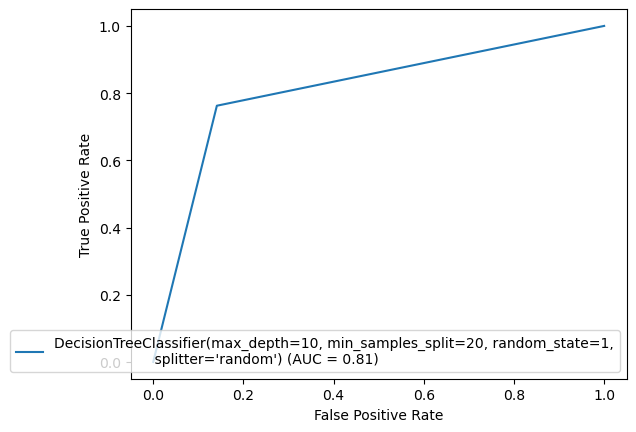

In [108]:
from sklearn import metrics
fpr,tpr,thresholds=metrics.roc_curve(y_test,pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=Final_model)
display.plot()

**Observation:-**
    
*1) Here we can see we plot ROC curve for our Final Model.*

*2) Our acceptable score for AUC is 0.5 But here we can see our AUC score is 0.81 that is way above than the acceptable range and that is good for our model.*

*3) As we can see our AUC score is 0.81 that's pretty close to 1 means 100% that means our model can give the prediction almost perfectly.*

# Serialization

In [109]:
#Saving the best model
import joblib
joblib.dump(Final_model,"Titanic_Survive_prediction.pkl")

['Titanic_Survive_prediction.pkl']

# Deserialization

In [110]:
model=joblib.load("Titanic_Survive_prediction.pkl")
prediction=model.predict(x_test)
prediction

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,

In [111]:
a=np.array(y_test)
Test=pd.DataFrame()
Test["Prediction"]=prediction
Test["Original"]=a
Test

,Prediction,Original
0,0,1
1,1,0
2,0,0
3,0,0
4,0,1
...,...,...
318,1,1
319,0,0
320,0,1
321,1,0


# User define fuction to predict Survival of passenger

In [112]:
def survival(a):
    
    a=a.reshape(1,-1)
    result=model.predict(a)
    if result==0:
        print("Alas! This passenger will not survive")
        
    else:
        print("Hurray! This passenger will survive")

In [113]:
data=np.array([3,1.0,22.0,1,0,517.0,1.457770,2.0])

In [114]:
survival(data)

Hurray! This passenger will survive
